In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [3]:
from sklearn.manifold import TSNE

## Generate sintatic data

In [23]:
num_class_1 = 1000
num_class_2 = 1000

In [24]:
mean1 = np.array([1,1])
cov1 =  np.array([[1, 0.2],[0.2, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, num_class_1)
y1 = np.zeros((num_class_1))

In [25]:
mean2 = np.array([10,1])
cov2 =  np.array([[0.1, 0],[0, 0.1]])
X2 = np.random.multivariate_normal(mean2, cov2, num_class_2)
y2 = np.ones((num_class_2))

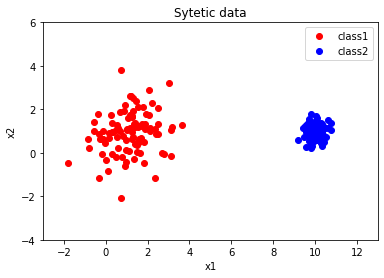

In [26]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.xlim([-3, 13])
plt.ylim([-4, 6])
plt.legend(['class1', 'class2'])
plt.title('Sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [27]:
X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

In [28]:
t_SNE = TSNE(n_components = 2, perplexity = 30)

In [29]:
start_time = time.time()
X_trans = t_SNE.fit_transform(X)
elapsed_time = time.time() - start_time

In [30]:
print("The execution of t-SNE last for ", elapsed_time, "s")

The execution of t-SNE last for  0.6083724498748779 s


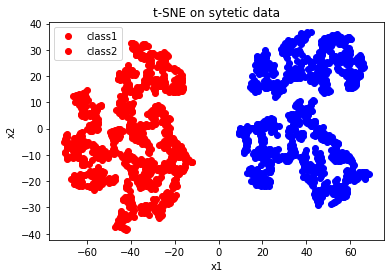

In [15]:
plt.plot(X_trans[np.where(y == 0),0], X_trans[np.where(y == 0),1], 'ro')
plt.plot(X_trans[np.where(y == 1),0], X_trans[np.where(y == 1),1], 'bo')
plt.legend(['class1', 'class2'])
plt.title('t-SNE on sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [36]:
n = 1000
start_time = time.time()
for i in  np.arange(1 , n):
    for j in  np.arange(1 , n):
        k = 1
elapsed_time = time.time() - start_time    
print("The execution of t-SNE last for ", elapsed_time, "s")

The execution of t-SNE last for  9.975426197052002 s


In [41]:
test_arr = np.array([[1,2,4], [3,4,1], [3,2,2]])

In [42]:
np.diff(test_arr)

array([[ 1,  2],
       [ 1, -3],
       [-1,  0]])

In [43]:
test_arr

array([[1, 2, 4],
       [3, 4, 1],
       [3, 2, 2]])

In [45]:
ans = test_arr - test_arr[1,:]

In [46]:
ans

array([[-2, -2,  3],
       [ 0,  0,  0],
       [ 0, -2,  1]])

In [47]:
np.sum(ans, axis = 1)

array([-1,  0, -1])

In [74]:
def compute_pairwise_distances(X, metric):
    if (metric == "euclidean") :
        distance = np.zeros((X.shape[0], X.shape[0]))
        start_time = time.time()
        for i in np.arange(0, X.shape[0]):
             distance[i,:] = np.sum((X - X[i, :])**2, axis = 1)
        elapsed_time = time.time() - start_time    
        print("last for ", elapsed_time, "s")
           
        return distance
        
    else:
        raise ValueError("Incorrect type of metric.")

In [76]:
distance = compute_pairwise_distances(test_arr, "euclidean")

last for  0.0009624958038330078 s


In [77]:
distance

array([[ 0., 17.,  8.],
       [17.,  0.,  5.],
       [ 8.,  5.,  0.]])

In [35]:
p = np.array([0.5, 0.1, 0.1, 0.1, 0.2])
y = - p * np.log2(p)

In [36]:
np.sum(y)

1.9609640474436814

In [17]:
0.4 * np.log2(0.4)

-0.5287712379549449

In [19]:
0.5 * np.log2(0.5)

-0.5

In [37]:
np.log2(np.e)

1.4426950408889634